In [1]:
!pip install tensorflow --upgrade

In [2]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

2022-11-19 08:23:32.293795: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/tensorflow
2022-11-19 08:23:32.947662: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/tensorflow
2022-11-19 08:23:32.947760: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH:

In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

In [4]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

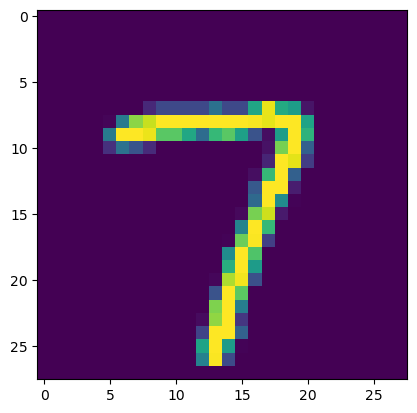

In [6]:
plt.imshow(x_train[5100])

In [7]:
np.argmax(y_train[5100])

0

In [8]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

In [9]:
number_of_classes = 10  #storing the no of classes in a variable

In [10]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

In [11]:
#create model
model=Sequential ()

2022-11-19 08:23:35.002747: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/tensorflow
2022-11-19 08:23:35.002775: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [13]:
#flatten the dimension of the image
model.add(Flatten())

In [14]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

In [15]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [16]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [17]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 102ms/step
[[6.0166411e-02 9.3983358e-01 1.0369957e-24 9.0719036e-23 5.2365291e-17
  2.4591601e-22 3.4681358e-34 1.0872437e-08 2.0911663e-22 5.9961848e-23]]


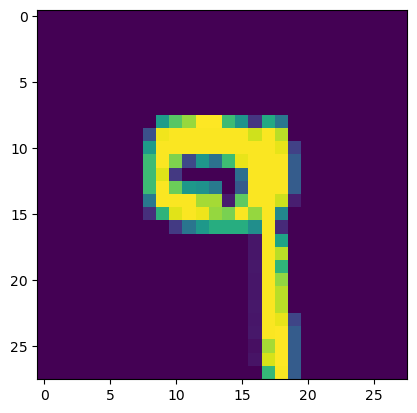

In [18]:
plt.imshow(x_test[6000])

In [19]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[1]


In [20]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

In [21]:
# Save the model
model.save('models/mnistCNN.h5')

In [22]:
cd models

/home/wsuser/work/models


In [23]:
!tar -zcvf hdr_deployment.tgz mnistCNN.h5

mnistCNN.h5


In [24]:
ls -1

DigitRecog_IBM_model.tar.gz
hdr_deployment.tgz
mnistCNN.h5


In [25]:
!pip install watson-machine-learning-client --upgrade

In [26]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"1muZ2BlsYyVL6sDrscmEqAIS1-t1sgejQRu_b-zfQPgX"
}
client = APIClient(credentials)
client

In [27]:
client.spaces.get_details()

{'resources': [{'entity': {'description': '',
    'name': 'final',
    'scope': {'bss_account_id': 'f34d4f12ddcc46e3814b99b880d84b43'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '45d3233d-568f-4665-8878-f40eb25e8d94',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '179b6ab1a3ee486cbce960d2681e50ca',
        'api_key': 'jLYbwzmu7hC54F0fW0o-PlFaq6gkbeTXenBRrVOMgTt9',
        'secret_access_key': '6b972fd732f4ecfb557c6d9280ed5667848087676f80af03',
        'service_id': 'ServiceId-9bcbbeae-e20d-434e-af6c-911acaff6b63'},
       'editor': {'access_key_id': 'ee9a1db166a8485c87184cdd6a9cccca',
        'api_key': 'C3pRTi3dxRDZjCu0Zr1w1R051TC_q6hcqH-Dr4vtFC_T',
        'resource_key_crn': 'crn:v1:bluemix:public:cloud-object-storage:global:a/f34d4f12ddcc46e3814b99b880d84b43:4c15a3fd-5d53-42a0-9d64-37b0643369e4::',
        'secret_access_key': '87f4a94e5e704fced88a8e64798bac9369cc867d5f4

In [28]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [29]:
space_uid = guid_from_space_name(client,'final')
print("Space UID = " + space_uid)

Space UID = 14626ef9-5295-402c-b30b-c53d9409ab9d


In [30]:
client.set.default_space(space_uid)

'SUCCESS'

In [31]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [32]:
software_space_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [33]:
model_details = client.repository.store_model(model='hdr_deployment.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Recognition System",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [34]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-19T08:23:44.688Z',
  'id': '65cad484-4fce-4360-b3d5-836998e01f03',
  'modified_at': '2022-11-19T08:23:47.158Z',
  'name': 'Digit Recognition System',
  'owner': 'IBMid-66700049XR',
  'resource_key': '6b1a0979-b5bc-42a1-ac5a-c126ca14c456',
  'space_id': '14626ef9-5295-402c-b30b-c53d9409ab9d'},
 'system': {'warnings': []}}

In [35]:
model_id = client.repository.get_model_id(model_details)
model_id

'65cad484-4fce-4360-b3d5-836998e01f03'

In [37]:
client.repository.download(model_id,'Digit.tar.gz')

Successfully saved model content to file: 'Digit.tar.gz'


'/home/wsuser/work/models/Digit.tar.gz'

In [38]:
ls

DigitRecog_IBM_model.tar.gz  Digit.tar.gz  hdr_deployment.tgz  mnistCNN.h5


In [39]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [40]:
model = load_model("mnistCNN.h5")

In [41]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1rEQ4QsDyr45SbIYkkmEXGolFpDjMBjlc1KmxrsH2V1U',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'digitrecognition-donotdelete-pr-kvpefjqsoxebrc'
object_key = '4.jpg'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

In [42]:
img = Image.open(streaming_body_3).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [43]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [44]:
img

In [45]:
pred = model.predict(im2arr)
print(pred)

1/1 [==============================] - 0s 55ms/step
[[7.8538782e-05 9.9992144e-01 2.3515475e-15 4.4919371e-20 6.3284583e-14
  6.4861911e-24 1.4830563e-31 2.4512673e-13 1.9983242e-21 2.6808084e-18]]


In [46]:
print(np.argmax(pred, axis=1)) #printing our Labels

[1]
